 As perguntas que queremos responder com a nossa análise exploratória vão ser sobre as vagas apresentadas na referida pesquisa para o nível Entry Level.

 Vamos expor os salários médios por modelo de trabalho (presencial, remoto, híbrido) e por tipo de contrato (meio período, fulltime, freelance, contrato), sempre focando no nível "Entry Level".

 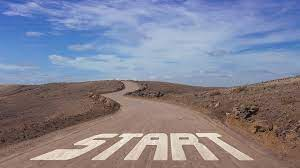

Aqui daremos início importando as bibliotecas que serão usadas nessa Análise Exploratória.

Vamos usar Pandas para fazer a manipulação de dados, Matplotlib e Seaborn para criar visualizações que nos permitam ter uma noção mais clara da análise e também uma biblioteca chamada Warnings - dica que peguei do querido Vini Segatto - e que nos permite pular possíveis warnings após avaliarmos que não serão importantes nem tratão prejuízos imediatos.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Carregar o conjunto de dados
df = pd.read_csv('/content/data_science_salaries.csv')

# Filtrar dados para "Entry Level"
df_entry_level = df[df['experience_level'] == 'Entry-level']

# Agrupar por 'company_location' e 'work_models', contar as vagas e ordenar os resultados
top_countries_vagas_per_work_model = df_entry_level.groupby(['company_location', 'work_models']).size().reset_index(name='count')

# Separar os dados por modelo de trabalho
on_site_data = top_countries_vagas_per_work_model[top_countries_vagas_per_work_model['work_models'] == 'On-site'].sort_values(by='count', ascending=False).head(5)
hybrid_data = top_countries_vagas_per_work_model[top_countries_vagas_per_work_model['work_models'] == 'Hybrid'].sort_values(by='count', ascending=False).head(5)
remote_data = top_countries_vagas_per_work_model[top_countries_vagas_per_work_model['work_models'] == 'Remote'].sort_values(by='count', ascending=False).head(5)

# Agrupar por 'company_location' e 'work_models', calcular a média dos salários e ordenar os resultados
top_countries_salaries_per_work_model = df_entry_level.groupby(['company_location', 'work_models'])['salary_in_usd'].mean().reset_index(name='average_salary')

# Separar os dados por modelo de trabalho e ordenar por salário médio
on_site_salaries = top_countries_salaries_per_work_model[top_countries_salaries_per_work_model['work_models'] == 'On-site'].sort_values(by='average_salary', ascending=False).head(5)
hybrid_salaries = top_countries_salaries_per_work_model[top_countries_salaries_per_work_model['work_models'] == 'Hybrid'].sort_values(by='average_salary', ascending=False).head(5)
remote_salaries = top_countries_salaries_per_work_model[top_countries_salaries_per_work_model['work_models'] == 'Remote'].sort_values(by='average_salary', ascending=False).head(5)

# Agrupar por 'job_title', contar as vagas e ordenar os resultados
top_jobs = df_entry_level.groupby('job_title').size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)

# Configurações básicas para os gráficos de vagas
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))



<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Após importar as bibliotecas que serão usadas nessa Análise Exploratória e fazermos os primeiros tratamentos visando agrupar os dados que serão usados, vamos fazer uma breve checagem sobre o conteúdo.


In [2]:
print(df.isnull().sum(), end='\n\n')


job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64



Nenhum valor nulo. Isso nos permite seguir em frente com segurança. Caso houvesse algum valor nulo, precisaríamos analisar como isso afetaria as perguntas que queremos responder e qual a melhor estratégia para lidar com esse inconveniente.

Vamos agora ver como o dataset é constituído em termos de números de linhas e números de colunas:


In [3]:
print(df.shape)

(6599, 11)


Temos 6599 linhas e 11 colunas. Ou seja, temos aí 6599 respostas para a pesquisa de Salários de Data Sciente. Como vamos analisar somente as respostas referentes ao nível Entry Level - cargos iniciais na carreira, esse número tende a ser significativamente menor. Vamos responder essa pergunta logo mais.

Por ora, vamos agora saber quais colunas temos no nosso conjunto de dados:


In [4]:
print(df.columns)

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')


Seguem as descrições das colunas, conforme explicitado na página do Kaggle do conjunto de dados em traduçã livre minha:



1.   Itejob_title:	O nome do cargo.

2. experience_level: nível de experiência
3. employment_type:	Indica se o trabalho é dedicação total, meio período, contrato ou freelance.
4. work_models: mostra se o trabalho é remoto, hibrido ou presencial.
5. work_year: o ano em que a informação foi coletada.
6. employee_residence: local da residência do empregado.
7. salary: o salário na moeda local do empregado.
8. salary_currency: a moeda do salário.
9. salary_in_usd: O salário convertido em dólares
10. company_location: o país onde a empresa está localizada.
11. company_size: o tamanho da empresa, dado o número de empregados.



In [5]:
df.nunique()

job_title              132
experience_level         4
employment_type          4
work_models              3
work_year                5
employee_residence      87
salary                1833
salary_currency         22
salary_in_usd         2147
company_location        75
company_size             3
dtype: int64

O código df.nunique() nos mostra o número de ocorrências de cada resposta. Os valores únicos em uma coluna de um dataframe.

Um dado que nos salta aos olhos é que temos 132 respostas diferentes para job_title. Bastante coisa (!!!) e seria interessante investigar. Não vamos olhar através dessa janela pois o caso dessa exposição é tratar aqui somente ao que se referir ao top 5 para oportunidades Entry Level.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


Acima pudemos ver, através do comando df.info() um pequeno apanhado das colunas, contagem de linhas, contagem de colunas, memória usada, nome das colunas e seus tipos de dados.

In [7]:
df.describe()

# aqui teremos O comando df.describe() do Pandas Python fornece um resumo das estatísticas descritivas
# para cada coluna numérica em um DataFrame. Particularmente não gosto desse tanto de casas decimais.
# vou usar um comando aqui pra dar uma enxugada nas coisas.


,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [8]:
pd.set_option('display.precision', 2)
df.describe()

,work_year,salary,salary_in_usd
count,6599.00,6.60e+03,6599.00
mean,2022.82,1.79e+05,145560.56
std,0.67,5.26e+05,70946.84
min,2020.00,1.40e+04,15000.00
25%,2023.00,9.60e+04,95000.00
50%,2023.00,1.40e+05,138666.00
75%,2023.00,1.88e+05,185000.00
max,2024.00,3.04e+07,750000.00


Fiquei curioso em olhar esses dados sob a ótica do Entry Level. Vamos tentar uma coisa:

In [9]:
# Filtrar o DataFrame para incluir apenas entradas com 'experience_level' igual a 'Entry-level'
df_entry_level = df[df['experience_level'] == 'Entry-level']

# Aplicar o método .describe() ao DataFrame filtrado
descricao = df_entry_level['salary_in_usd'].describe()

# Exibir as estatísticas descritivas
print(descricao)

count       565.00
mean      84448.92
std       48758.32
min       15000.00
25%       49646.00
50%       75000.00
75%      110000.00
max      350000.00
Name: salary_in_usd, dtype: float64


#É isso aí. Agora vamos aos gráficos e descobrir como estão as coisas pra quem está entrando na área de Dados!


Primeiro, vamos dar uma olhada nos 5 países com mais respostas para a pesquisa assinalando vagas presenciais, híbridas e remotas.

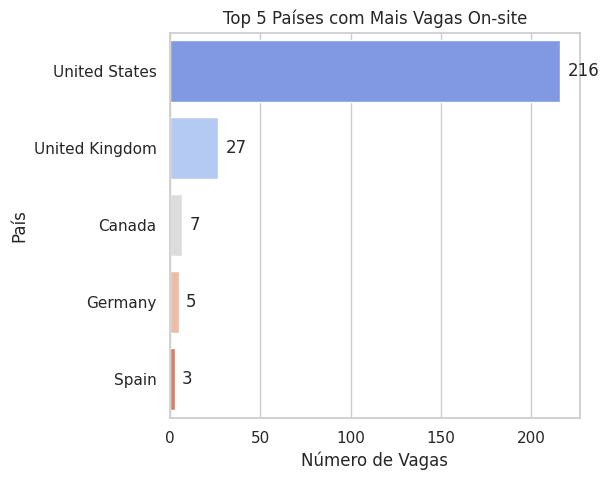

In [10]:


sns.set(style="whitegrid")

def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.figure(figsize=(18, 5))

# Gráfico para On-site
ax1 = plt.subplot(1, 3, 1)
sns.barplot(x='count', y='company_location', data=on_site_data, palette='coolwarm', ax=ax1)
add_labels(ax1)
plt.title('Top 5 Países com Mais Vagas On-site')
plt.xlabel('Número de Vagas')
plt.ylabel('País')

plt.show()

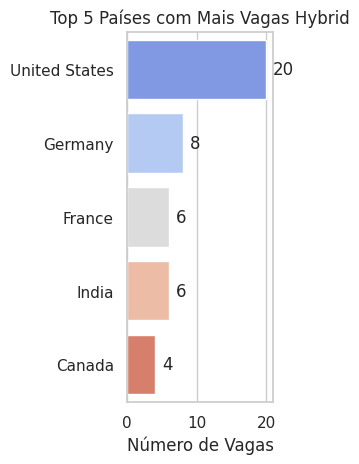

In [11]:
# Gráfico para Hybrid
ax2 = plt.subplot(1, 3, 2)
sns.barplot(x='count', y='company_location', data=hybrid_data, palette='coolwarm', ax=ax2)
add_labels(ax2)
plt.title('Top 5 Países com Mais Vagas Hybrid')
plt.xlabel('Número de Vagas')
plt.ylabel('')


plt.show()


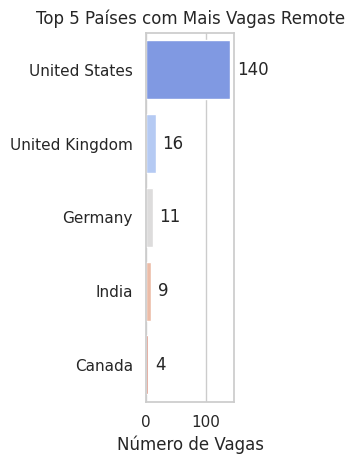

In [12]:
# Gráfico para Remote
ax3 = plt.subplot(1, 3, 3)
sns.barplot(x='count', y='company_location', data=remote_data, palette='coolwarm', ax=ax3)
add_labels(ax3)
plt.title('Top 5 Países com Mais Vagas Remote')
plt.xlabel('Número de Vagas')
plt.ylabel('')

plt.tight_layout()
plt.show()

Percebemos aí que os Estados Unidos são os grandes criadores de vagas na áres de dados Entry Level. Alemanha, Canadá e Reino Unido também aparecem nas 3 listas.

Vamos olhar agora para os 5 países com os melhores salários segundo os respondentes da pesquisa na forma de trabalho remoto, presencial e híbrido pra galera que está entrando na área de dados:

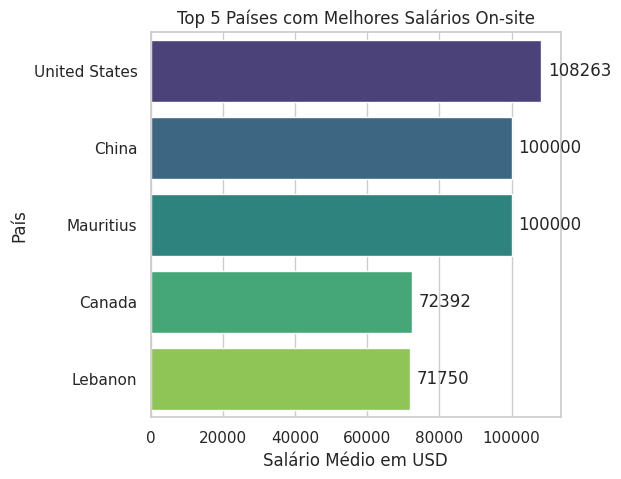

In [13]:
plt.figure(figsize=(18, 5))

# Ajustes e criação dos gráficos, considerando que você já tem 'on_site_salaries', 'hybrid_salaries', e 'remote_salaries'

# Gráfico para On-site
ax1 = plt.subplot(1, 3, 1)
sns.barplot(x='average_salary', y='company_location', data=on_site_salaries, palette='viridis', ax=ax1)
add_labels(ax1)
plt.title('Top 5 Países com Melhores Salários On-site')
plt.xlabel('Salário Médio em USD')
plt.ylabel('País')
plt.show()

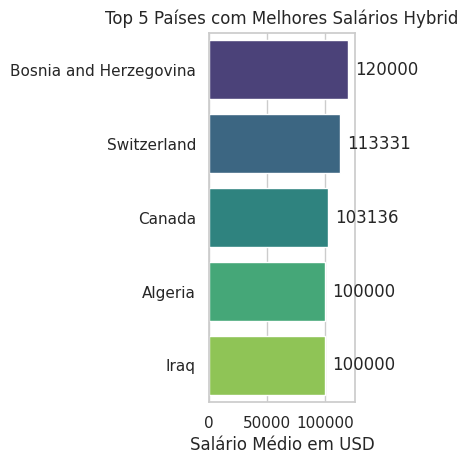

In [14]:
# Gráfico para Hybrid
ax2 = plt.subplot(1, 3, 2)
sns.barplot(x='average_salary', y='company_location', data=hybrid_salaries, palette='viridis', ax=ax2)
add_labels(ax2)
plt.title('Top 5 Países com Melhores Salários Hybrid')
plt.xlabel('Salário Médio em USD')
plt.ylabel('')
plt.show()

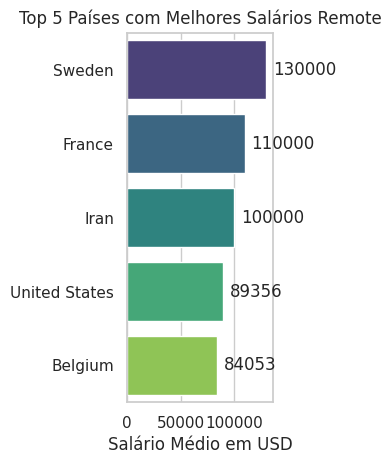

In [15]:
# Gráfico para Remote
ax3 = plt.subplot(1, 3, 3)
sns.barplot(x='average_salary', y='company_location', data=remote_salaries, palette='viridis', ax=ax3)
add_labels(ax3)
plt.title('Top 5 Países com Melhores Salários Remote')
plt.xlabel('Salário Médio em USD')
plt.ylabel('')


plt.show()

Parece que os Estados Unidos não são muito chegados em oferecer grandes salários para os times que não sejam presenciais. Será que é porque a preferencia deles é por vagas presenciais e também sabem do grande interesse que as pessoas tem em morar nos Estados Unidos e por isso não barganham tanto salários melhoras para outras formas de trabalho?

A Europa, segundo os respondentes das perguntas, aparentemente é melhor pagadora para trabalhadores remotos. Vemos ali um Irã no meio dos bons pagadores de salários remotos para Entry Level e para formato híbrido vemos Irã, Iraque e Argélia.

#Vamos agora olhar o top 5 de cargos com maior número de vagas para o Entry Level segundo os respondentes da pesquisa:

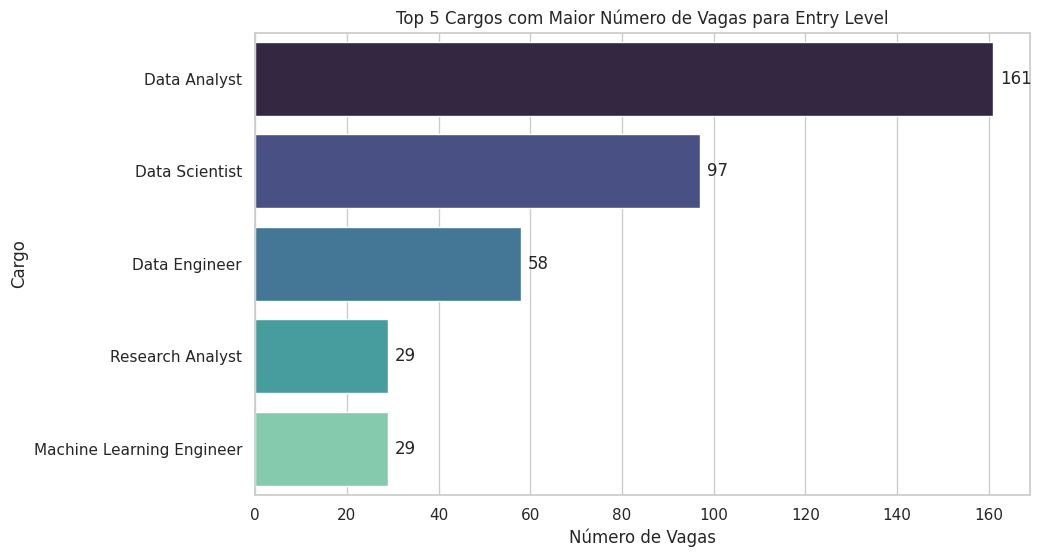

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='job_title', data=top_jobs, palette='mako')
add_labels(ax)
plt.title('Top 5 Cargos com Maior Número de Vagas para Entry Level')
plt.xlabel('Número de Vagas')
plt.ylabel('Cargo')
plt.show()

# That is it! O número de respondentes da pesquisa assinalou 161 respostas para Analistas de dados.

Logo atrás, com 39% a menos vemos os famigerados Cientistas de Dados. E com pouco menos de 1/3 das respostas vemos os Engenheiros de Dados.

## Vamos olhar agora o número de Vagas para os formatos Presencial, Remoto e Híbrido.

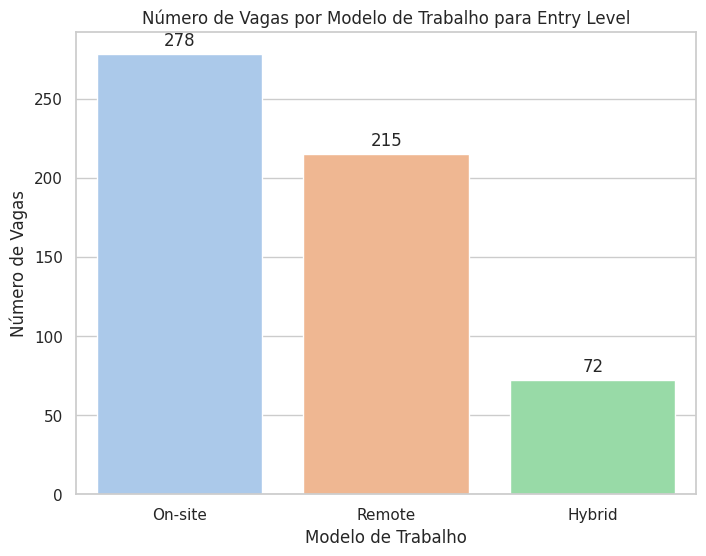

In [17]:

# Contar o número de vagas para cada 'work_models' em Entry Level
work_models_counts = df_entry_level['work_models'].value_counts().reset_index()
work_models_counts.columns = ['work_models', 'count']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='work_models', y='count', data=work_models_counts, palette='pastel')

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Número de Vagas por Modelo de Trabalho para Entry Level')
plt.xlabel('Modelo de Trabalho')
plt.ylabel('Número de Vagas')
plt.show()


Vimos aqui que Presencial ainda é o maior número de vagas segundo os respondentes da pesquisa. Com 22% a menos vemos o formato de trabalho Remoto. E por último, bem mais afastado,o formato híbrido

# Vamos olhar agora qual tamanho de empresa costuma contratar mais pessoas no Entry Level, segundo os respondentes da pesquisa.

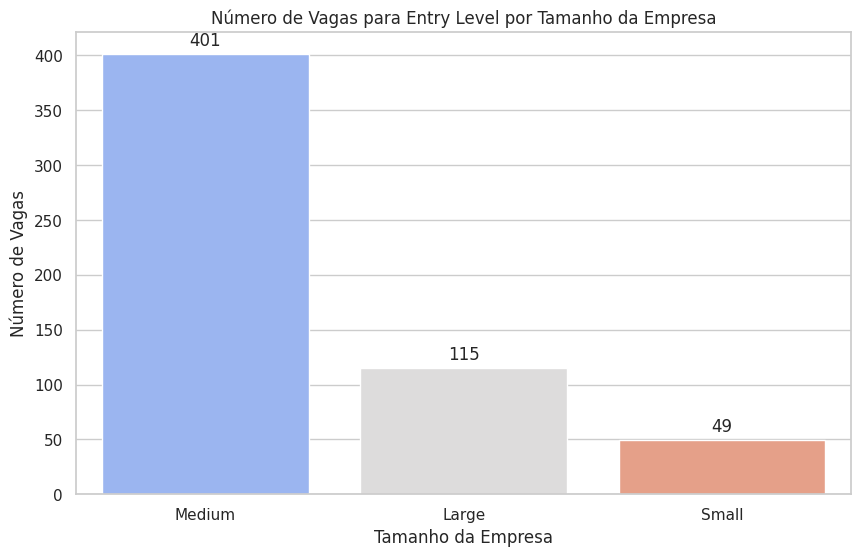

In [18]:
# Filtrar dados para "Entry Level"
df_entry_level = df[df['experience_level'] == 'Entry-level']

# Contar o número de vagas por 'company_size'
company_size_counts = df_entry_level['company_size'].value_counts().reset_index()
company_size_counts.columns = ['company_size', 'count']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='company_size', y='count', data=company_size_counts, palette='coolwarm')

# Adicionar rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Número de Vagas para Entry Level por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Vagas')
plt.show()

Empresas médias costumam contratar pessoas do nível Entry Level duas vezes e meia mais que empresas grandes. Eu achava que as empresas menores tinham mais perspectivas de contratar pessoas que estavam entrando no mercado.

#Vamos ver agora uma análise sobre os modelos de trabalho e os salários pagos segundo os respondentes da pesquisa.

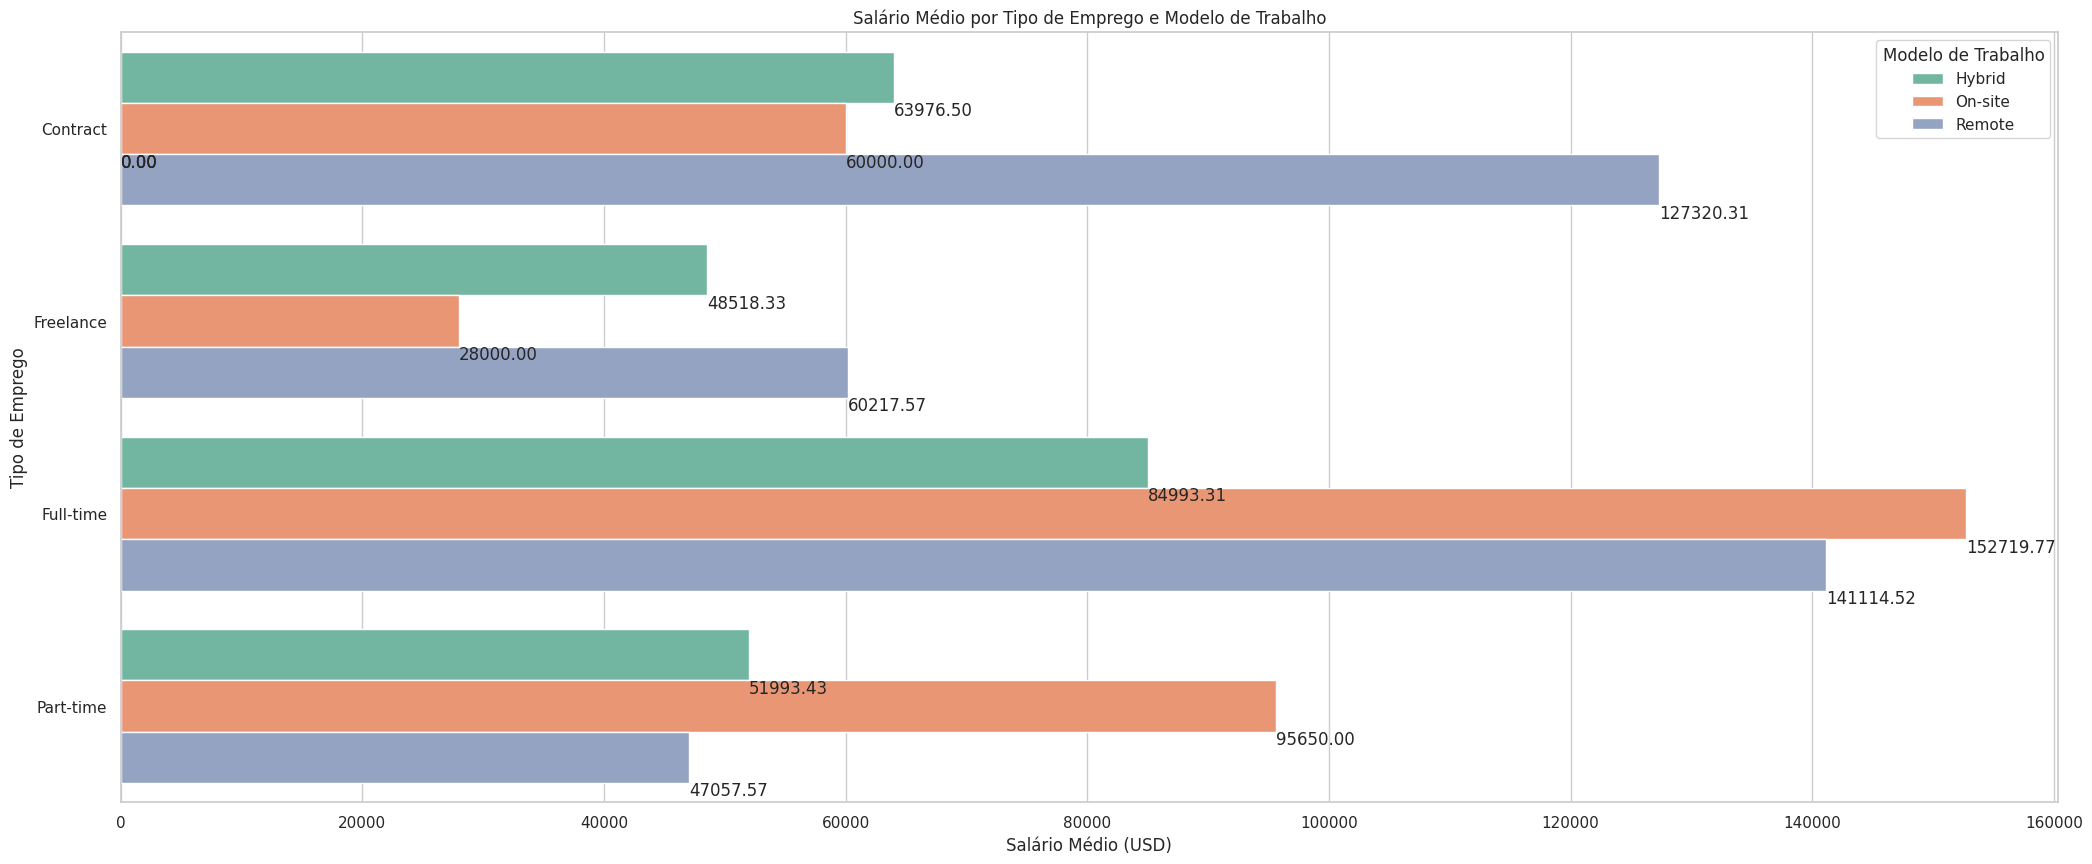

In [19]:
salary_stats_corrected = df.groupby(['work_models', 'employment_type'])['salary_in_usd'].agg(['mean', 'min', 'max']).reset_index()
# Preparando os dados para visualização
salary_avg = salary_stats_corrected[['work_models', 'employment_type', 'mean']]

plt.figure(figsize=(25, 10))
ax = sns.barplot(x='mean', y='employment_type', hue='work_models', data=salary_avg, palette='Set2')
plt.title('Salário Médio por Tipo de Emprego e Modelo de Trabalho')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('Tipo de Emprego')
plt.legend(title='Modelo de Trabalho')

# Adicionando rótulos de dados
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2. + 0.2, '{:1.2f}'.format(width), ha="left")

plt.show()

O modelo de trabalho por contrato é a forma que melhor paga por trabalhadores remotos em relação aos outros modelos de trabalho. Segundo o site Rock Content, essa forma de trabalho pode ser entendida por um funcionário que vai ser contratado por um projeto de longo prazo. As empresas que pagam freelancers também preferem remunerar melhor os funcionários remotos em detrimento às outras formas de trabalho.

Já as empresas com modelo de trabalho fulltime pagam melhor os funcionários presenciais, seguido de perto do modelo remoto.

No formato Part-time, ou na minha tradução livre, meio-período, o formato presencial ainda tem os melhores salários, seguido pelo formato híbrido.

#Vamos olhar agora a evolução do número de cargos para o nível Entry Level. Será que houve evolução ao longo dos últimos anos?



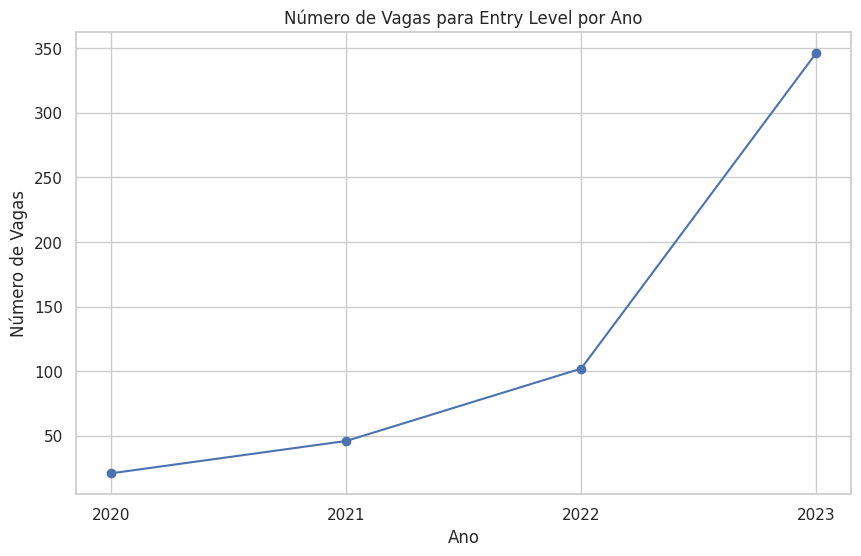

In [22]:
# Filtrar o DataFrame para incluir apenas entradas com 'experience_level' igual a 'Entry-level'
df_entry_level = df[(df['experience_level'] == 'Entry-level') & (df['work_year'] <= 2023)]


# Agrupar os dados por 'work_year' e contar o número de vagas para cada ano
vagas_por_ano = df_entry_level.groupby('work_year').size()

# Criar um gráfico de linhas para mostrar o número de vagas por ano
plt.figure(figsize=(10, 6))
plt.plot(vagas_por_ano.index, vagas_por_ano.values, marker='o', linestyle='-', color='b')
plt.title('Número de Vagas para Entry Level por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Vagas')
plt.grid(True)
plt.xticks(vagas_por_ano.index)  # Garantir que todos os anos sejam mostrados como ticks no eixo x
plt.show()

Uau! É um resultado expressivo. Vamos olhar como está o número de vagas para o cargo de Analista de Dados:


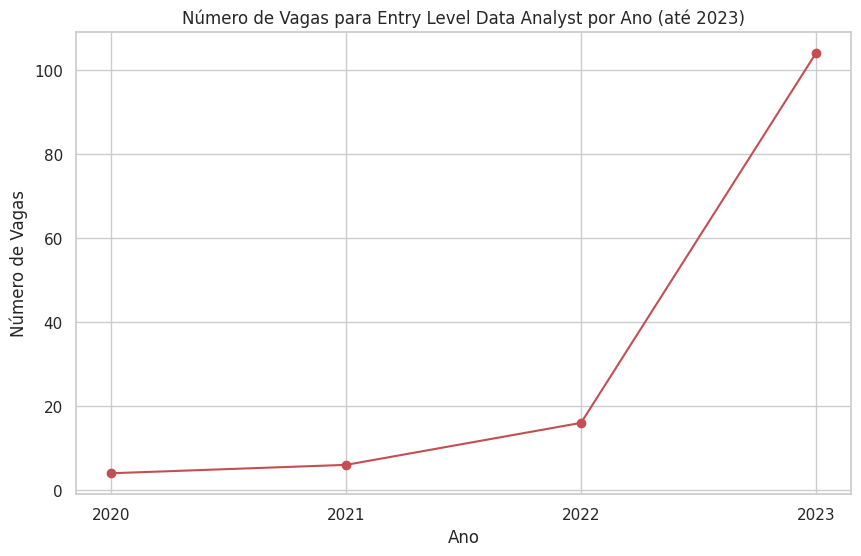

In [23]:
# Filtrar o DataFrame para incluir apenas entradas com 'experience_level' igual a 'Entry-level',
# 'work_year' até 2023, e o cargo de 'Data Analyst'
df_entry_level_analyst = df[(df['experience_level'] == 'Entry-level') &
                            (df['work_year'] <= 2023) &
                            (df['job_title'] == 'Data Analyst')]

# Agrupar os dados por 'work_year' e contar o número de vagas para cada ano
vagas_por_ano_analyst = df_entry_level_analyst.groupby('work_year').size()

# Criar um gráfico de linhas para mostrar o número de vagas por ano até 2023 para o cargo de Data Analyst
plt.figure(figsize=(10, 6))
plt.plot(vagas_por_ano_analyst.index, vagas_por_ano_analyst.values, marker='o', linestyle='-', color='r')
plt.title('Número de Vagas para Entry Level Data Analyst por Ano (até 2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Vagas')
plt.grid(True)
plt.xticks(vagas_por_ano_analyst.index)  # Garantir que todos os anos sejam mostrados como ticks no eixo x
plt.show()

Coisa linda. Não tem como não empolgar, certo?

É isso aí. Obrigado de novo professor André Yukio pela oportunidade de exercitar a minha curiosidade em relação aos dados!

Pudemos ver com essa exposição uma análise dos modelos de trabalho, salários e números de vagas para pessoas que estão entrando na área de Dados. Vimos os países que pagam maiores salários, quais oferecem mais oportunidades e vimos por último a evolução desses números.